In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data Importing

In [2]:
df = pd.read_json("fashion_products_dataset.json")

In [3]:
df.head()

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


In [4]:
df.category.nunique()

4

In [14]:
yr = df['crawled_at'].dt.day.to_frame()
yr['crawled_at'].unique()

array([10, 11])

In [11]:
df.shape

(30000, 17)

### Checking the Data types of the data

In [43]:
df.dtypes

_id                        object
actual_price               object
average_rating             object
brand                      object
category                   object
crawled_at         datetime64[ns]
description                object
discount                   object
images                     object
out_of_stock                 bool
pid                        object
product_details            object
seller                     object
selling_price              object
sub_category               object
title                      object
url                        object
dtype: object

In [ ]:
# df['actual_price'] = df['actual_price'].str.replace(",", "").replace('', np.nan)

### We are changing the data types and replacing '' values with null 

In [44]:
df['average_rating'] = df['average_rating'].apply(lambda x: float(x) if x != "" else np.nan)

In [45]:
df['average_rating'].dtype

dtype('float64')

In [46]:
df['actual_price'] = df['actual_price'].apply(lambda x: int(x.replace(',', '')) if x != '' else np.nan)

In [47]:
df['actual_price'].dtype

dtype('float64')

In [48]:
df['selling_price'] = df['selling_price'].apply(lambda x: int(x.replace(',', '')) if x != '' else np.nan)

In [49]:
df['actual_price'].dtype

dtype('float64')

### To change the discount values to int we are taking the integer out off the string

In [50]:
def discount(x):
    if x == '' or x == " ":
        return np.nan
    else:
        if '%' not in x[:2]:
            return int(x[:2])
        else:
            return int(x[0])

In [51]:
df['discount'] = df['discount'].apply(lambda x: discount(x))

In [52]:
df['discount'].dtype

dtype('float64')

### We finally changed the data type

In [53]:
df.dtypes

_id                        object
actual_price              float64
average_rating            float64
brand                      object
category                   object
crawled_at         datetime64[ns]
description                object
discount                  float64
images                     object
out_of_stock                 bool
pid                        object
product_details            object
seller                     object
selling_price             float64
sub_category               object
title                      object
url                        object
dtype: object

### We are again checking the columns that have '' values

In [56]:
for i in df.columns:
    for j in df[i]:
        if j == '' or j == ' ':
            print(i)
            break

brand
description
seller


### Replacing the unwaanted values with null

In [58]:
df['brand'] = df['brand'].replace('', np.nan).replace(' ', np.nan)
df['seller'] = df['seller'].replace('', np.nan).replace(' ', np.nan)

### Now we checking for the null values

In [59]:
df.isnull().sum()

_id                   0
actual_price        863
average_rating     2446
brand              2068
category              0
crawled_at            0
description           0
discount            941
images                0
out_of_stock          0
pid                   0
product_details       0
seller             1741
selling_price         2
sub_category          0
title                 0
url                   0
dtype: int64

In [60]:
df.isnull().sum() / len(df) * 100

_id                0.000000
actual_price       2.876667
average_rating     8.153333
brand              6.893333
category           0.000000
crawled_at         0.000000
description        0.000000
discount           3.136667
images             0.000000
out_of_stock       0.000000
pid                0.000000
product_details    0.000000
seller             5.803333
selling_price      0.006667
sub_category       0.000000
title              0.000000
url                0.000000
dtype: float64

In [64]:
df['selling_price'].fillna(df['selling_price'].mean(), inplace=True)

In [70]:
df['brand'].fillna(method='bfill', inplace=True)

In [73]:
df['seller'].fillna(method='bfill', inplace=True)

<Axes: xlabel='actual_price', ylabel='Density'>

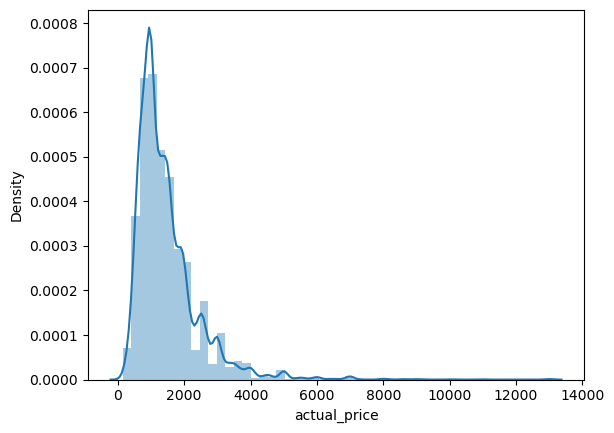

In [61]:
sns.distplot(df['actual_price'])

In [62]:
df['actual_price'].skew()

2.8871488358608195

In [71]:
gross_median = df.groupby('brand')['actual_price'].median()

In [72]:
for brand in df['brand'].unique():
    brand_mask = df['brand'] == brand
    df.loc[brand_mask, 'actual_price'] = df.loc[brand_mask, 'actual_price'].fillna(gross_median[brand])

<Axes: xlabel='average_rating', ylabel='Density'>

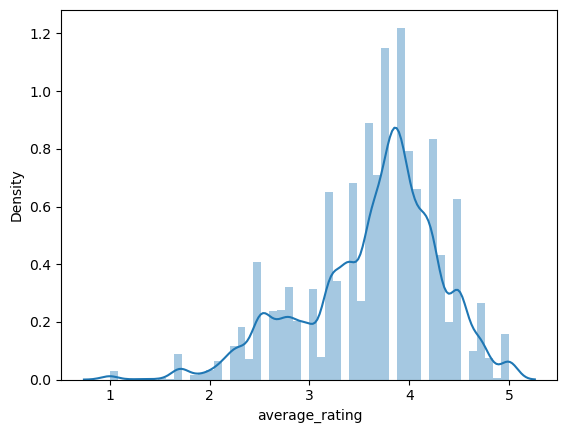

In [74]:
sns.distplot(df['average_rating'])

In [76]:
df['average_rating'].skew()

-0.7033216405202181

In [77]:
rating_median = df.groupby('brand')['average_rating'].median()

In [78]:
for brand in df['brand'].unique():
    brand_mask = df['brand'] == brand
    df.loc[brand_mask, 'average_rating'] = df.loc[brand_mask, 'average_rating'].fillna(rating_median[brand])

<Axes: xlabel='discount', ylabel='Density'>

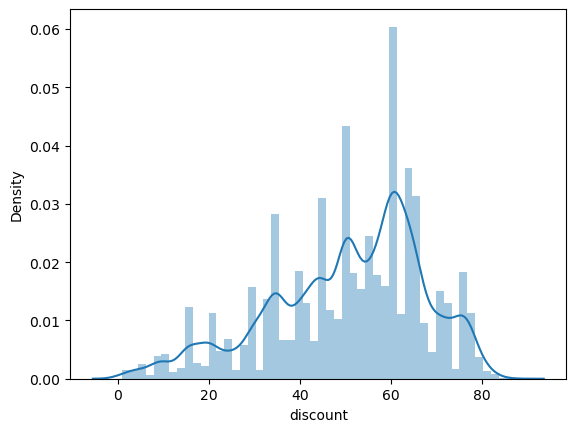

In [79]:
sns.distplot(df['discount'])

In [80]:
df.discount.skew()

-0.6022450243134871

In [88]:
dis_median = df.groupby(['brand'])['discount'].median()

In [89]:
dis_median

brand
A                    66.0
A J STYL             58.0
A to Z life sty      67.0
A2Z QUALITY GROU     64.0
ABC ANY BUDY CLE     46.0
                     ... 
vims rai             64.0
virl                 75.0
wangjia              58.0
yellowvib            59.0
your shopping sto    68.0
Name: discount, Length: 324, dtype: float64

In [91]:
for brand in df['brand'].unique():
    brand_mask = df['brand'] == brand
    df.loc[brand_mask, 'discount'] = df.loc[brand_mask, 'discount'].fillna(dis_median[brand])

In [93]:
m=df.groupby(['brand']).agg({'actual_price':'median'})
df['actual_price'] = df['actual_price'].fillna(m['actual_price'].mean())

In [94]:
av=df.groupby(['brand']).agg({'average_rating':'median'})
df['average_rating'] = df['average_rating'].fillna(av['average_rating'].mean())

In [95]:
dis=df.groupby(['brand']).agg({'discount':'median'})
df['discount'] = df['discount'].fillna(round(dis['discount'].mean()))

In [98]:
df['seller'].fillna(method='ffill', inplace=True)

In [99]:
df.isnull().sum()

_id                0
actual_price       0
average_rating     0
brand              0
category           0
crawled_at         0
description        0
discount           0
images             0
out_of_stock       0
pid                0
product_details    0
seller             0
selling_price      0
sub_category       0
title              0
url                0
dtype: int64

### Null values are treated

In [117]:
corr = df[['actual_price', 'average_rating', 'discount', 'selling_price']].corr()
corr

,actual_price,average_rating,discount,selling_price
actual_price,1.000000,-0.059061,0.151886,0.829118
average_rating,-0.059061,1.000000,-0.012957,-0.060199
discount,0.151886,-0.012957,1.000000,-0.275119
selling_price,0.829118,-0.060199,-0.275119,1.000000


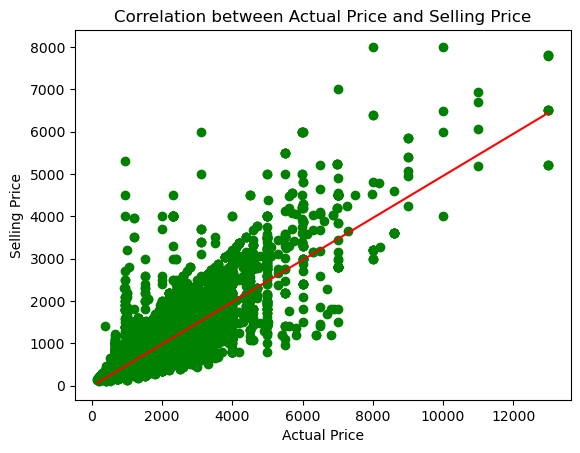

In [120]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
plt.scatter(df['actual_price'],df['selling_price'],color='green')
plt.xlabel('Actual Price')
plt.ylabel('Selling Price')
plt.title('Correlation between Actual Price and Selling Price')
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['actual_price'], df['selling_price'])

# Calculate the regression line
x_values = np.linspace(min(df['actual_price']), max(df['actual_price']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label='Regression Line')

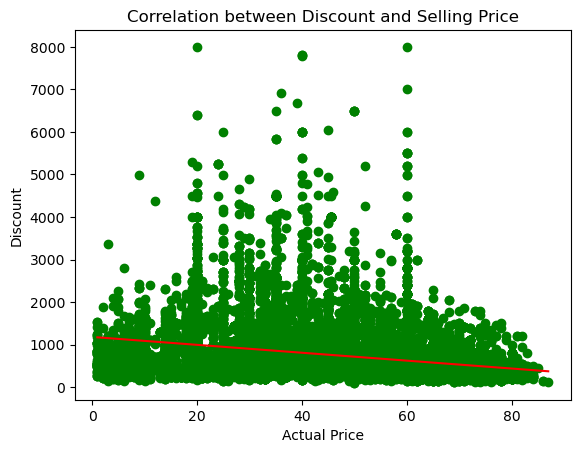

In [122]:
plt.scatter(df['discount'],df['selling_price'],color='green')
plt.xlabel('Actual Price')
plt.ylabel('Discount')
plt.title('Correlation between Discount and Selling Price')
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['discount'], df['selling_price'])

# Calculate the regression line
x_values = np.linspace(min(df['discount']), max(df['discount']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label='Regression Line')

### Dropping some columns

In [ ]:
#feature Engineering

In [125]:
df['_id'].nunique()

30000

In [126]:
df['pid'].nunique()

28080

In [128]:
df['title'].nunique()

4579

In [130]:
df.seller.nunique()

534

In [127]:
df.columns

Index(['_id', 'actual_price', 'average_rating', 'brand', 'category',
       'crawled_at', 'description', 'discount', 'images', 'out_of_stock',
       'pid', 'product_details', 'seller', 'selling_price', 'sub_category',
       'title', 'url'],
      dtype='object')

In [131]:
df.drop(columns=['_id', 'crawled_at', 'description', 'images', 'product_details', 'url'], inplace=True)

In [ ]:
# saving as excel

In [132]:
df.to_excel('E-Commerce.xlsx')